# Image filtering

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from imutils import paths
import os

In [2]:
def print_image(img, cmap="gray", title="img", name_img="img.pdf", save=False, fontsize=12):

    # plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.title(title)#, fontsize=fontsize)
    plt.xticks([])
    plt.yticks([])

    if(save):
        plt.savefig(name_img)

    # plt.show()

['agw39d00.png',
 'afm90c00-first_1.png',
 'adh36e00-page2_1.png',
 'ajj10e00.png',
 'aki32e00.png']

../../Datasets/Objects_Database/Example_Documents/aki32e00.png
(3274, 2560)
kernel size: (319,319)


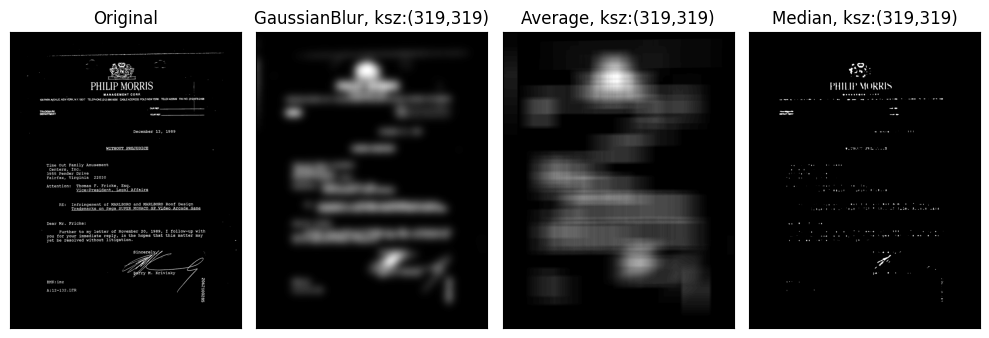

In [5]:
db_path = "../../Datasets/Objects_Database/Example_Documents"


image_name = "aki32e00.png"

image_file = os.path.join(db_path, image_name)

print(image_file)

## Load image ##
img = cv2.imread(image_file)



## Gray scale ##
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_shape = img.shape
print(img_shape)


nf = 4
i=1

plt.figure(figsize=(10,8))

#### Ploting filtering ####
plt.subplot(1,nf,i)
print_image(img, title="Original")
i += 1

#### Compute kernel size ####
k = min(img_shape)//8
if((k%2)==0):
    k -= 1
print(f"kernel size: ({k},{k})")


#### Gaussian filtering ######
sigmax = 0
kernel = (k,k)
f1 = cv2.GaussianBlur(img, kernel, sigmax)
gk = cv2.getGaussianKernel(k, sigmax)

# print_image_1(img, title="GaussianBlur")
plt.subplot(1,nf,i)
print_image(f1, title=f"GaussianBlur, ksz:({k},{k})")
i += 1

#### Average filtering ####
k = k
kernel = (k,k)
f3 = cv2.blur(img, kernel)
plt.subplot(1,nf,i)
print_image(f3, title=f"Average, ksz:({k},{k})")
i += 1

#### Median Blurring ####
kernel = (k,k)
f4 = cv2.medianBlur(img,17)
plt.subplot(1,nf,i)
print_image(f4, title=f"Median, ksz:({k},{k})")
i += 1

plt.tight_layout()
plt.show()


#### Binarization ####


# Bluring

In [8]:
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import pandas as pd

# from tqdm import tqdm
# from skimage.feature import hog
# import os
# import shutil

# from sklearn import svm
# from joblib import dump, load

In [9]:
def object_bluring(image, kp=16):
    
    ## Copy original image ##
    img = image.copy()
    ## image to draw contours ##
    img_contour = image.copy()
    
    
    #### Image preprocessing ####
    ## image to gray scale ##
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ## Compute kernel size ##
    k = min(img.shape)//kp
    if((k%2)==0):
        k -= 1
    # print(f"imagesize: {img.shape}, kernel size: ({k},{k})")
    
    ## Filtering ##
    sigmax = 0
    kernel = (k,k)
    img = cv2.GaussianBlur(img, kernel, sigmax)
    # gk = cv2.getGaussianKernel(k, sigmax)
    # print_image(image, title="gaussian")

    # return img_contour, objects_list
    return img

def print_image(img, cmap="gray", title="img", fontsize=12):

    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.figure()
    plt.imshow(image)#, cmap=cmap)
    plt.title(title)#, fontsize=fontsize)
    plt.xticks([])
    plt.yticks([])
    # plt.show()

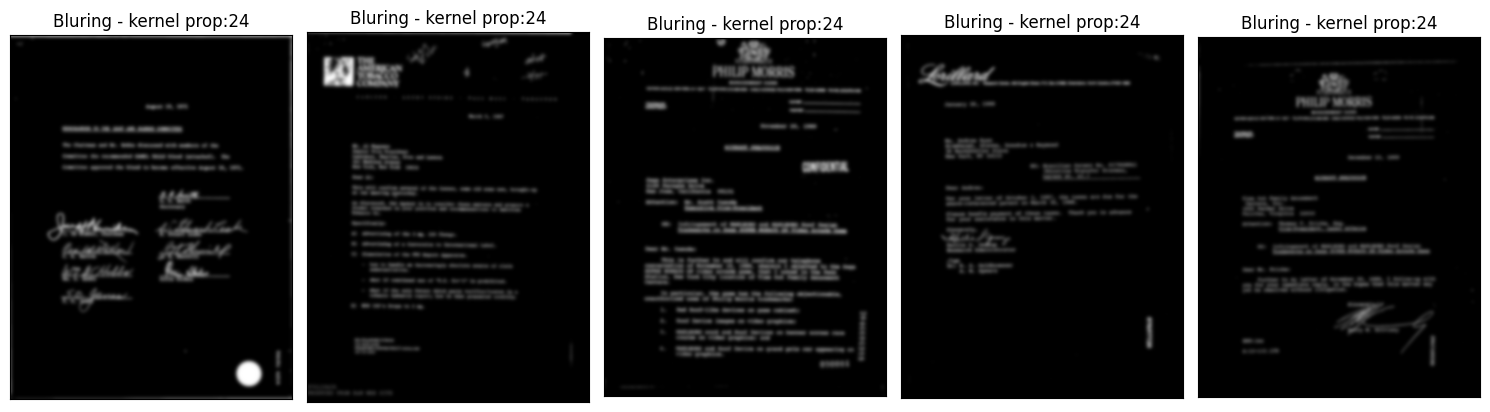

In [10]:
## Images path ##
db_path = "../../Datasets/Objects_Database/Example_Documents"

## List images from path ##
images_list = list(paths.list_images(db_path))

#### Invert images ####
inv = False


plt.figure(figsize=(15,10))

for i in range(len(images_list)):
    
    ## take image ##
    img_file = images_list[i]
    
    ## Load image ##
    image = cv2.imread(img_file)
    # print_image(image, title="Original")
    
    ## Searching ##
    kp=24
    img_contour = object_bluring(image, kp)
    
    ## Make graphic ##
    plt.subplot(1, len(images_list), i+1)
    print_image(img_contour, title=f"Bluring - kernel prop:{kp}")


plt.tight_layout()
plt.show()

# Binarization

In [1]:
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import pandas as pd

In [2]:
def object_binarization(image, kp=16, inv=False):
    
    ## Copy original image ##
    img = image.copy()
    ## image to draw contours ##
    img_contour = image.copy()
    
    
    #### Image preprocessing ####
    ## image to gray scale ##
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ## Compute kernel size ##
    k = min(img.shape)//kp
    if((k%2)==0):
        k -= 1
    # print(f"imagesize: {img.shape}, kernel size: ({k},{k})")
    
    ## Filtering ##
    sigmax = 0
    kernel = (k,k)
    img = cv2.GaussianBlur(img, kernel, sigmax)
    gk = cv2.getGaussianKernel(k, sigmax)
    # print_image(image, title="gaussian")

    #### binarization by otzu ####
    if(inv):
        u, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    else:
        u, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # print_image(img)

    # return img_contour, objects_list
    return img

def print_image(img, cmap="gray", title="img", fontsize=12):

    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.figure()
    plt.imshow(image)#, cmap=cmap)
    plt.title(title)#, fontsize=fontsize)
    plt.xticks([])
    plt.yticks([])
    # plt.show()

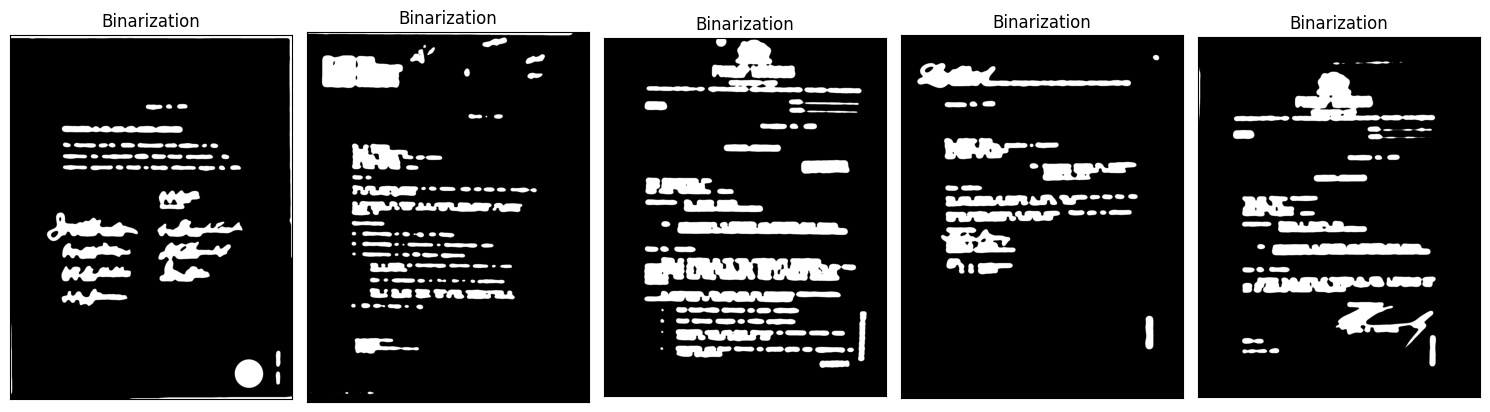

In [4]:
## Images path ##
db_path = "../../Datasets/Objects_Database/Example_Documents"
## List images from path ##
images_list = list(paths.list_images(db_path))

#### Invert images ####
inv = False

plt.figure(figsize=(15,10))

kp = 24

for i in range(len(images_list)):
    
    ## take image ##
    img_file = images_list[i]
    
    ## Load image ##
    image = cv2.imread(img_file)
    # print_image(image, title="Original")
    
    ## Searching ##
    img_contour = object_binarization(image, kp, inv=inv)
    
    ## Make graphic ##
    plt.subplot(1, len(images_list), i+1)
    print_image(img_contour, title="Binarization")


plt.tight_layout()
plt.show()

# Region proposal

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os


In [5]:
def object_segmentation(image, kp=16, n_std=0, margin=0, lw=4, inv=False):
    
    ## Copy original image ##
    img = image.copy()
    ## image to draw contours ##
    img_contour = image.copy()
    
    
    #### Image preprocessing ####
    ## image to gray scale ##
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ## Compute kernel size ##
    k = min(img.shape)//kp
    if((k%2)==0):
        k -= 1
    # print(f"imagesize: {img.shape}, kernel size: ({k},{k})")
    
    ## Filtering ##
    sigmax = 0
    kernel = (k,k)
    img = cv2.GaussianBlur(img, kernel, sigmax)
    # gk = cv2.getGaussianKernel(k, sigmax)
    # print_image(image, title="gaussian")

    #### binarization by otzu ####
    if(inv):
        u, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    else:
        u, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # print_image(img)

    #### search contours ####
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #print("Contours:",len(contours))

    #### lista para almacenar los objetos ####
    objects_list = []
    areas_list = []
    annotations_list = []
    
    #### Check object area ####
    area_threshold = check_area(contours, n_std)
    
    for cnt in (contours):
        
        #### calcular area del objeto ####
        area = cv2.contourArea(cnt)
        
        if(area > area_threshold):
        
            # print(area)
            
            #### dibujar contornos ####
            # cv2.drawContours(img_contour, cnt, -1, (255, 0, 0), 3)
            
            #### perimetro del objeto ####
            # peri = cv2.arcLength(cnt,True)
            # #print(peri)
            
            #### calcular aproximacion del objeto ####
            # approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            # print(len(approx))
            # objCor = len(approx)
            # x, y, w, h = cv2.boundingRect(approx)
            
            #### calcular el rctangulo que enciarra al objeto ####
            x, y, w, h = cv2.boundingRect(cnt)
            ## Save annotations ##
            annotations_list.append([x, y, w, h])
            
            #### dibujar el rectangulo que encierra al objeto ####
            cv2.rectangle(img_contour, (x,y), (x+w, y+h), (0,255,0), lw)
            
            #### extraer el iesimo caracter ####
            #### agregar condicionales ####
            # w_i, h_i, _ = img.shape
            
            ## Segmentar el objeto deseado ##
            img_object = image[y-margin : y+h+margin, x-margin : x+w+margin, :]
            
            #### almacenar caracteres en una lista ####
            objects_list.append(img_object)
            areas_list.append(area)
            #print(caracter_2.shape)


    #### imprimir imagen con los contornos dibujados ####
    # print_image(imgContour, save=False)

    # print(f"caracteres encontrados: {len(objects_list)}")
    # print(f"Area minima: {min(areas_list)}, Area maxima: {max(areas_list)}, Area mean: {np.mean(areas_list)}.")
    
    #### retornar lista de los caracteres encontrados ####        
    # return img_contour, objects_list
    return img_contour, objects_list, areas_list, annotations_list, area_threshold


def check_area(obj_contours, n_std=0):
    ## List to save the area of objects ##
    area_arr = np.empty(0)
    ## Loop ##
    for cnt in (obj_contours):
        ## calcular area del objeto ##
        area = cv2.contourArea(cnt)
        ## Save value ##
        area_arr = np.append(area_arr, area)
    
    
    ## return area threshold to select objects ##
    area_mean = np.mean(area_arr)
    area_std = np.std(area_arr)
    
    area_th = area_mean + n_std*area_std
    
    # print(a_mean)
    return area_th

def create_dir(path):

    dirs = path.split("/")
    n_path = ""
    for i in range(len(dirs)):
        
        n_path = os.path.join(n_path, dirs[i])
        # print(n_path)
        a = os.path.isdir(n_path)   
        # print(a) 
        if(not(a)):
            os.mkdir(n_path)


Number of documents: 5


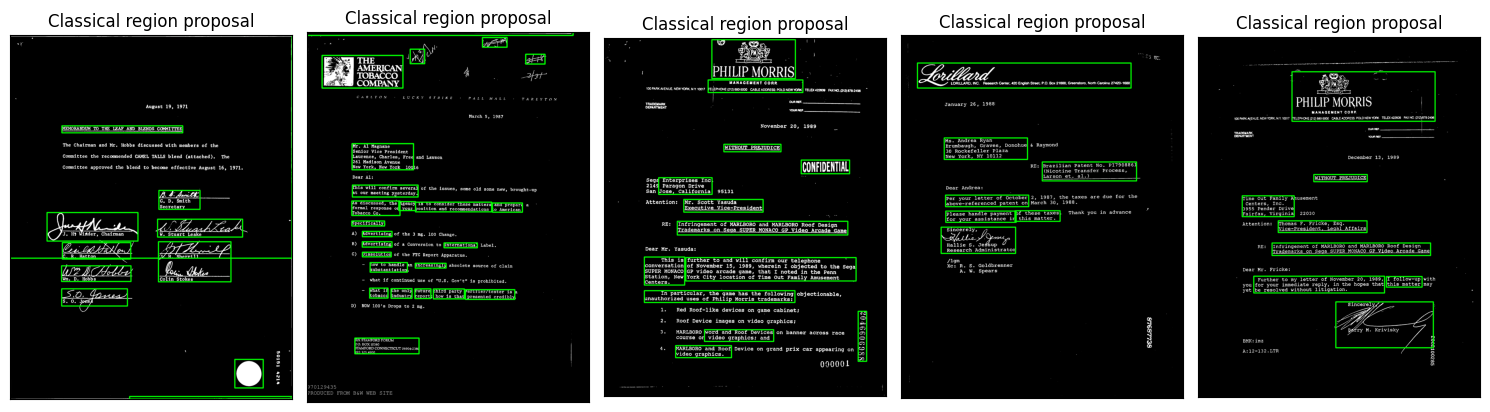

In [18]:

## Images path ##
db_path = "../../Datasets/Objects_Database/Example_Documents"

## Kernel proportions size ##
kp_list = [24]
## Std over mean as threshold ##
n_std = 0

selected_documents = os.listdir(db_path)
print(f"Number of documents: {len(selected_documents)}")


plt.figure(figsize=(15,10))

kp = 24

for i in range(len(selected_documents)):
    
    ## take image ##
    img_file = os.path.join(db_path,selected_documents[i])
    
    ## Load image ##
    image = cv2.imread(img_file)
    # print_image(image, title="Original")
    
    img_contour, objects_list, areas_list, annotations_list, area_threshold = object_segmentation(image, kp=24, n_std=0, margin=0, lw=10, inv=False)

    ## Make graphic ##
    plt.subplot(1, len(images_list), i+1)
    print_image(img_contour, title="Classical region proposal")


plt.tight_layout()
plt.show()
